In [6]:
cd /home/dongdong/SCR/rid_p53.run

/scratch/gpfs/dongdong/rid_p53.run


In [4]:
import pathlib
pathlib.Path("aa/aa/aa").mkdir(parents=True, exist_ok=True)

In [33]:
import os
for it in range(4):
    for en in range(30):
        trjdir='/scratch/gpfs/hsinyu/linfengz/rid/rid_p53.run.run.03.wall.1.2/iter.%06d/00.enhcMD/%03d/' %(it,en)
        outdir='/home/dongdong/SCR/rid_p53.run/iter.%06d/00.enhcMD/%03d/' %(it,en)
        pathlib.Path(outdir).mkdir(parents=True, exist_ok=True)
        trjname=trjdir+'traj_comp.xtc'
        outtrj=outdir+'md_nopbc.xtc'
        outrmsd=outdir+'rmsd.xvg'
        os.system('echo -e "1\n" | gmx trjconv -s crystal_now.tpr -f %s -o %s -pbc mol -ur compact' %(trjname, outtrj))
        os.system('echo -e "11\n11\n" | gmx rms -s crystal_p.gro -f %s -o %s -n index_p.ndx' %(outtrj, outrmsd))

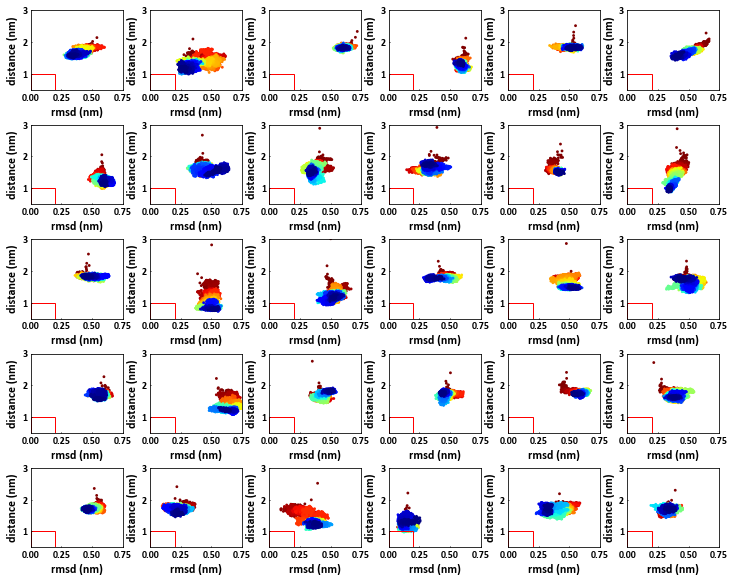

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.pylab as pl
import matplotlib.patches as patches
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=12)
leg_prop = font_manager.FontProperties(fname=font_path, size=10)
cmap = plt.cm.get_cmap("jet_r")
cmap.set_over("white")

fig = plt.figure(figsize=(10,8))
num_walkers=30
n_dih=24
colors = pl.cm.jet(np.linspace(0,1,num_walkers))
for en in range(num_walkers):
    allrmsd=[]
    alldist=[]
    for it in range(8):
        rmsdfile='/home/dongdong/SCR/rid_p53.run/iter.%06d/00.enhcMD/%03d/rmsd.xvg' %(it,en)
        os.system("sed -i 's/^@/#/g' %s " %rmsdfile)
        plmfile='/scratch/gpfs/hsinyu/linfengz/rid/rid_p53.run.run.01/iter.%06d/00.enhcMD/%03d/plm.out' %(it,en)
        rmsd=np.loadtxt(rmsdfile)[:,1]
        distance=np.mean(np.loadtxt(plmfile)[:,-3:],axis=1)
        #print(np.loadtxt(plmfile)[:,-3:])
        allrmsd.extend(list(rmsd))
        alldist.extend(list(distance))
    #allrmsd=np.reshape(allrmsd,(1,-1))[0]
    #print(np.array(range(len(allrmsd))))
    #print(allrmsd)
    sub = fig.add_subplot(int(num_walkers)/6,6,en+1)
    #sub.plot(np.array(range(len(allrmsd)))/1000.0*4,allrmsd,lw=0.6)
    sub.scatter(allrmsd,alldist,c=np.arange(len(allrmsd)),cmap=cmap,lw = 0,s=8)
    sub.set_xlabel(r'rmsd (nm)',fontproperties=font_prop)
    sub.set_ylabel(r'distance (nm)',fontproperties=font_prop)
    sub.tick_params(direction="in", length=1)
    sub.add_patch(patches.Rectangle((0, 0.5),0.2,0.5, linewidth=1,edgecolor='r',facecolor='none'))
    plt.ylim(0.5,3)
    plt.xlim(0,0.75)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(10)
    #plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)
plt.show()

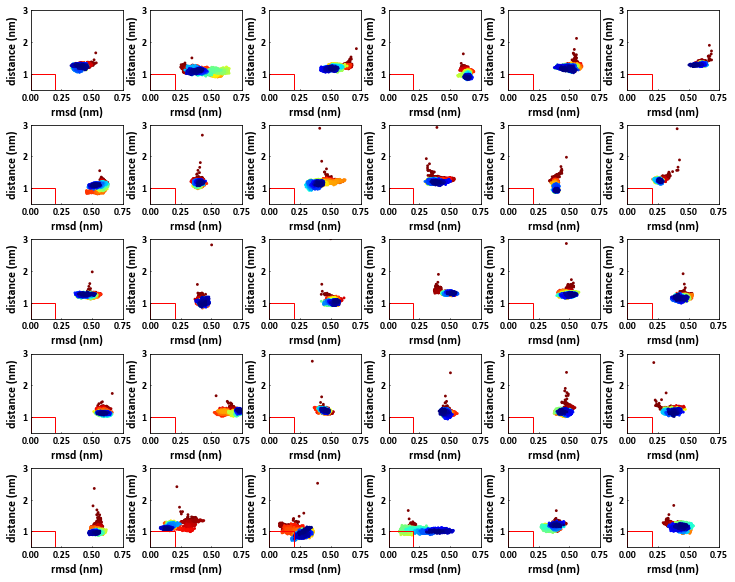

In [36]:
###wall 1.2
fig = plt.figure(figsize=(10,8))
num_walkers=30
n_dih=24
colors = pl.cm.jet(np.linspace(0,1,num_walkers))
for en in range(num_walkers):
    allrmsd=[]
    alldist=[]
    for it in range(4):
        rmsdfile='/home/dongdong/SCR/rid_p53.run/iter.%06d/00.enhcMD/%03d/rmsd.xvg' %(it,en)
        os.system("sed -i 's/^@/#/g' %s " %rmsdfile)
        plmfile='/scratch/gpfs/hsinyu/linfengz/rid/rid_p53.run.run.03.wall.1.2/iter.%06d/00.enhcMD/%03d/plm.out' %(it,en)
        rmsd=np.loadtxt(rmsdfile)[:,1]
        distance=np.mean(np.loadtxt(plmfile)[:,-3:],axis=1)
        #print(np.loadtxt(plmfile)[:,-3:])
        allrmsd.extend(list(rmsd))
        alldist.extend(list(distance))
    #allrmsd=np.reshape(allrmsd,(1,-1))[0]
    #print(np.array(range(len(allrmsd))))
    #print(allrmsd)
    sub = fig.add_subplot(int(num_walkers)/6,6,en+1)
    #sub.plot(np.array(range(len(allrmsd)))/1000.0*4,allrmsd,lw=0.6)
    sub.scatter(allrmsd,alldist,c=np.arange(len(allrmsd)),cmap=cmap,lw = 0,s=8)
    sub.set_xlabel(r'rmsd (nm)',fontproperties=font_prop)
    sub.set_ylabel(r'distance (nm)',fontproperties=font_prop)
    sub.tick_params(direction="in", length=1)
    sub.add_patch(patches.Rectangle((0, 0.5),0.2,0.5, linewidth=1,edgecolor='r',facecolor='none'))
    plt.ylim(0.5,3)
    plt.xlim(0,0.75)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(10)
    #plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)
plt.show()

In [51]:
import os
dirname='rid_p53.run.run.02.wall.1.5'
for it in range(8,21):
    for en in range(30):
        trjdir='/scratch/gpfs/hsinyu/linfengz/rid/%s/iter.%06d/00.enhcMD/%03d/' %(dirname,it,en)
        outdir='/home/dongdong/SCR/%s/iter.%06d/00.enhcMD/%03d/' %(dirname,it,en)
        pathlib.Path(outdir).mkdir(parents=True, exist_ok=True)
        trjname=trjdir+'traj_comp.xtc'
        outtrj=outdir+'md_nopbc.xtc'
        outrmsd=outdir+'rmsd.xvg'
        os.system('echo -e "1\n" | gmx trjconv -s crystal_now.tpr -f %s -o %s -pbc mol -ur compact' %(trjname, outtrj))
        os.system('echo -e "11\n11\n" | gmx rms -s crystal_p.gro -f %s -o %s -n index_p.ndx' %(outtrj, outrmsd))

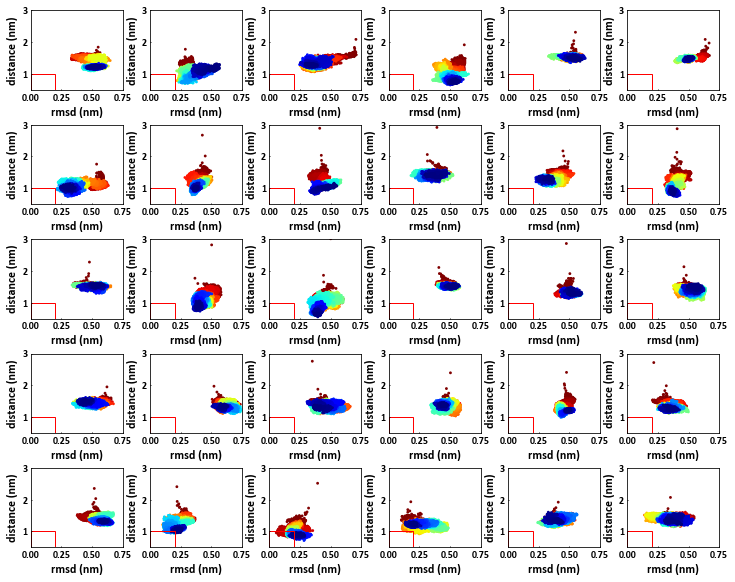

In [52]:
###wall 1.5
fig = plt.figure(figsize=(10,8))
num_walkers=30
n_dih=24
colors = pl.cm.jet(np.linspace(0,1,num_walkers))
for en in range(num_walkers):
    allrmsd=[]
    alldist=[]
    for it in range(21):
        rmsdfile='/home/dongdong/SCR/%s/iter.%06d/00.enhcMD/%03d/rmsd.xvg' %(dirname,it,en)
        os.system("sed -i 's/^@/#/g' %s " %rmsdfile)
        plmfile='/scratch/gpfs/hsinyu/linfengz/rid/%s/iter.%06d/00.enhcMD/%03d/plm.out' %(dirname,it,en)
        rmsd=np.loadtxt(rmsdfile)[:,1]
        distance=np.mean(np.loadtxt(plmfile)[:,-3:],axis=1)
        #print(np.loadtxt(plmfile)[:,-3:])
        allrmsd.extend(list(rmsd))
        alldist.extend(list(distance))
    #allrmsd=np.reshape(allrmsd,(1,-1))[0]
    #print(np.array(range(len(allrmsd))))
    #print(allrmsd)
    sub = fig.add_subplot(int(num_walkers)/6,6,en+1)
    #sub.plot(np.array(range(len(allrmsd)))/1000.0*4,allrmsd,lw=0.6)
    sub.scatter(allrmsd,alldist,c=np.arange(len(allrmsd)),cmap=cmap,lw = 0,s=8)
    sub.set_xlabel(r'rmsd (nm)',fontproperties=font_prop)
    sub.set_ylabel(r'distance (nm)',fontproperties=font_prop)
    sub.tick_params(direction="in", length=1)
    sub.add_patch(patches.Rectangle((0, 0.5),0.2,0.5, linewidth=1,edgecolor='r',facecolor='none'))
    plt.ylim(0.5,3)
    plt.xlim(0,0.75)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(10)
    #plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)
plt.show()

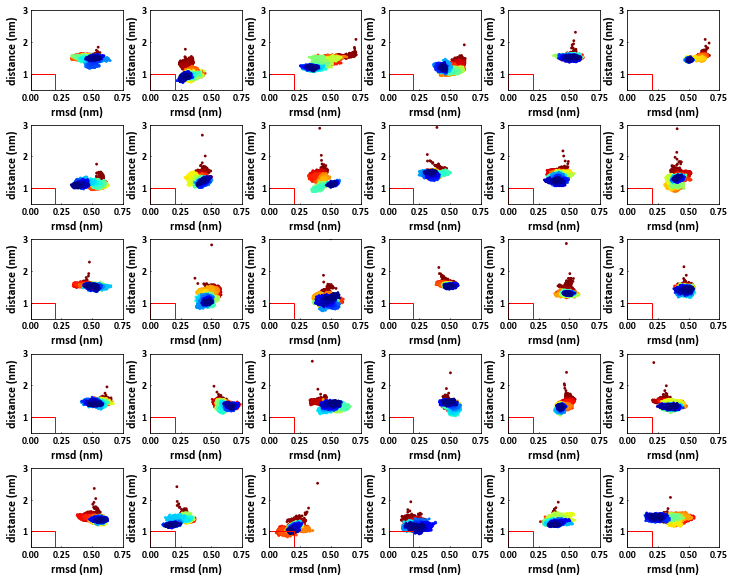

In [53]:
###wall 1.5
fig = plt.figure(figsize=(10,8))
num_walkers=30
n_dih=24
colors = pl.cm.jet(np.linspace(0,1,num_walkers))
for en in range(num_walkers):
    allrmsd=[]
    alldist=[]
    for it in range(7):
        rmsdfile='/home/dongdong/SCR/%s/iter.%06d/00.enhcMD/%03d/rmsd.xvg' %(dirname,it,en)
        os.system("sed -i 's/^@/#/g' %s " %rmsdfile)
        plmfile='/scratch/gpfs/hsinyu/linfengz/rid/%s/iter.%06d/00.enhcMD/%03d/plm.out' %(dirname,it,en)
        rmsd=np.loadtxt(rmsdfile)[:,1]
        distance=np.mean(np.loadtxt(plmfile)[:,-3:],axis=1)
        #print(np.loadtxt(plmfile)[:,-3:])
        allrmsd.extend(list(rmsd))
        alldist.extend(list(distance))
    #allrmsd=np.reshape(allrmsd,(1,-1))[0]
    #print(np.array(range(len(allrmsd))))
    #print(allrmsd)
    sub = fig.add_subplot(int(num_walkers)/6,6,en+1)
    #sub.plot(np.array(range(len(allrmsd)))/1000.0*4,allrmsd,lw=0.6)
    sub.scatter(allrmsd,alldist,c=np.arange(len(allrmsd)),cmap=cmap,lw = 0,s=8)
    sub.set_xlabel(r'rmsd (nm)',fontproperties=font_prop)
    sub.set_ylabel(r'distance (nm)',fontproperties=font_prop)
    sub.tick_params(direction="in", length=1)
    sub.add_patch(patches.Rectangle((0, 0.5),0.2,0.5, linewidth=1,edgecolor='r',facecolor='none'))
    plt.ylim(0.5,3)
    plt.xlim(0,0.75)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(10)
    #plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)
plt.show()

In [47]:
import os
dirname='rid_p53.run.run.03.wall.1.2'
for it in range(7,12):
    for en in range(30):
        trjdir='/scratch/gpfs/hsinyu/linfengz/rid/%s/iter.%06d/00.enhcMD/%03d/' %(dirname,it,en)
        outdir='/home/dongdong/SCR/%s/iter.%06d/00.enhcMD/%03d/' %(dirname,it,en)
        pathlib.Path(outdir).mkdir(parents=True, exist_ok=True)
        trjname=trjdir+'traj_comp.xtc'
        outtrj=outdir+'md_nopbc.xtc'
        outrmsd=outdir+'rmsd.xvg'
        os.system('echo -e "1\n" | gmx trjconv -s crystal_now.tpr -f %s -o %s -pbc mol -ur compact' %(trjname, outtrj))
        os.system('echo -e "11\n11\n" | gmx rms -s crystal_p.gro -f %s -o %s -n index_p.ndx' %(outtrj, outrmsd))

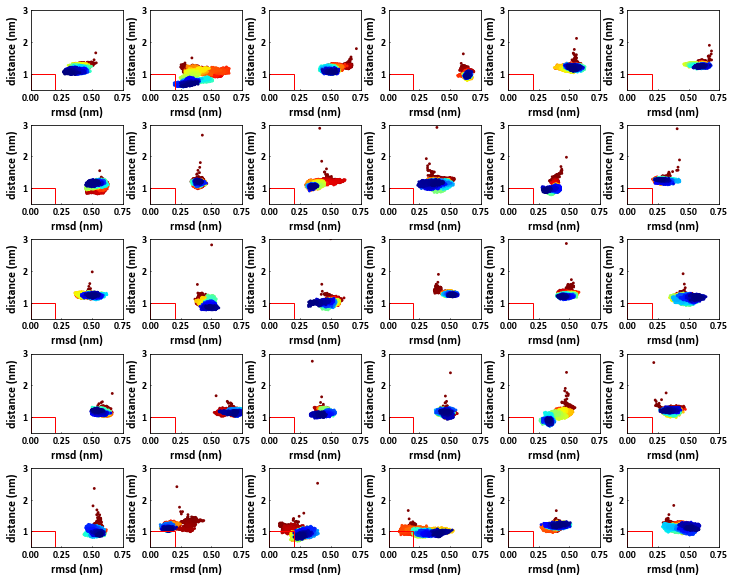

In [48]:
###wall 1.2
fig = plt.figure(figsize=(10,8))
num_walkers=30
n_dih=24
colors = pl.cm.jet(np.linspace(0,1,num_walkers))
for en in range(num_walkers):
    allrmsd=[]
    alldist=[]
    for it in range(12):
        rmsdfile='/home/dongdong/SCR/%s/iter.%06d/00.enhcMD/%03d/rmsd.xvg' %(dirname,it,en)
        os.system("sed -i 's/^@/#/g' %s " %rmsdfile)
        plmfile='/scratch/gpfs/hsinyu/linfengz/rid/%s/iter.%06d/00.enhcMD/%03d/plm.out' %(dirname,it,en)
        rmsd=np.loadtxt(rmsdfile)[:,1]
        distance=np.mean(np.loadtxt(plmfile)[:,-3:],axis=1)
        #print(np.loadtxt(plmfile)[:,-3:])
        allrmsd.extend(list(rmsd))
        alldist.extend(list(distance))
    #allrmsd=np.reshape(allrmsd,(1,-1))[0]
    #print(np.array(range(len(allrmsd))))
    #print(allrmsd)
    sub = fig.add_subplot(int(num_walkers)/6,6,en+1)
    #sub.plot(np.array(range(len(allrmsd)))/1000.0*4,allrmsd,lw=0.6)
    sub.scatter(allrmsd,alldist,c=np.arange(len(allrmsd)),cmap=cmap,lw = 0,s=8)
    sub.set_xlabel(r'rmsd (nm)',fontproperties=font_prop)
    sub.set_ylabel(r'distance (nm)',fontproperties=font_prop)
    sub.tick_params(direction="in", length=1)
    sub.add_patch(patches.Rectangle((0, 0.5),0.2,0.5, linewidth=1,edgecolor='r',facecolor='none'))
    plt.ylim(0.5,3)
    plt.xlim(0,0.75)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(10)
    #plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)
plt.show()

In [3]:
cd /home/dongdong/SCR/rid_p53.run

/scratch/gpfs/dongdong/rid_p53.run


In [4]:
import os
import pathlib
dirname='rid_p53.run.run.00.dongdong.scheme'
for it in range(13,17):
    for en in range(16):
        trjdir='/scratch/gpfs/hsinyu/linfengz/rid/%s/iter.%06d/00.enhcMD/%03d/' %(dirname,it,en)
        outdir='/home/dongdong/SCR/%s/iter.%06d/00.enhcMD/%03d/' %(dirname,it,en)
        pathlib.Path(outdir).mkdir(parents=True, exist_ok=True)
        trjname=trjdir+'traj_comp.xtc'
        outtrj=outdir+'md_nopbc.xtc'
        outrmsd=outdir+'rmsd.xvg'
        os.system('echo -e "1\n" | gmx trjconv -s crystal_now.tpr -f %s -o %s -pbc mol -ur compact' %(trjname, outtrj))
        os.system('echo -e "11\n11\n" | gmx rms -s crystal_p.gro -f %s -o %s -n index_p.ndx' %(outtrj, outrmsd))

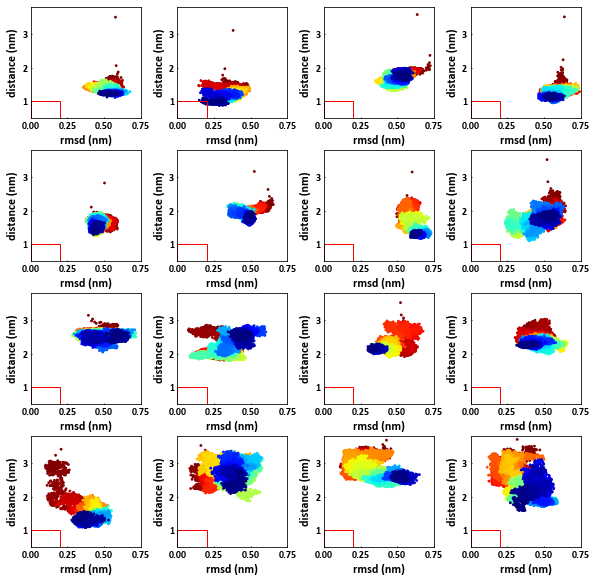

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.pylab as pl
import matplotlib.patches as patches
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=12)
leg_prop = font_manager.FontProperties(fname=font_path, size=10)
cmap = plt.cm.get_cmap("jet_r")
cmap.set_over("white")

fig = plt.figure(figsize=(8.2,8))
num_walkers=16
n_dih=24
colors = pl.cm.jet(np.linspace(0,1,num_walkers))
for en in range(num_walkers):
    allrmsd=[]
    alldist=[]
    for it in range(17):
        rmsdfile='/home/dongdong/SCR/%s/iter.%06d/00.enhcMD/%03d/rmsd.xvg' %(dirname,it,en)
        os.system("sed -i 's/^@/#/g' %s " %rmsdfile)
        plmfile='/scratch/gpfs/hsinyu/linfengz/rid/%s/iter.%06d/00.enhcMD/%03d/plm.out' %(dirname,it,en)
        #print(rmsdfile)
        rmsd=np.loadtxt(rmsdfile)[:,1]
        distance=np.mean(np.loadtxt(plmfile)[:,-3:],axis=1)
        #print(np.loadtxt(plmfile)[:,-3:])
        allrmsd.extend(list(rmsd))
        alldist.extend(list(distance))
    #allrmsd=np.reshape(allrmsd,(1,-1))[0]
    #print(np.array(range(len(allrmsd))))
    #print(allrmsd)
    sub = fig.add_subplot(int(num_walkers)/4,4,en+1)
    #sub.plot(np.array(range(len(allrmsd)))/1000.0*4,allrmsd,lw=0.6)
    sub.scatter(allrmsd,alldist,c=np.arange(len(allrmsd)),cmap=cmap,lw = 0,s=8)
    sub.set_xlabel(r'rmsd (nm)',fontproperties=font_prop)
    sub.set_ylabel(r'distance (nm)',fontproperties=font_prop)
    sub.tick_params(direction="in", length=1)
    sub.add_patch(patches.Rectangle((0, 0.5),0.2,0.5, linewidth=1,edgecolor='r',facecolor='none'))
    plt.ylim(0.5,3.8)
    plt.xlim(0,0.75)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(10)
    #plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)
plt.show()